In [14]:
import pandas as pd
import numpy as np

#from pyhive import hive            
#conn = hive.connect(host='dbslp0500', port=10002, username="nnair101" , password="",auth="LDAP")

#df = pd.read_sql("SELECT * FROM clinical_usrs.final_baker1 limit 1000", conn)
df = pd.read_csv('baker_data.csv')

In [15]:
print(df.shape)

(1048575, 27)


In [16]:
df.dtypes

final_sts_cd               object
icd_ver_cd                float64
diag_cd                    object
billed_amt                float64
liable_chrg_amt           float64
allw_amt                  float64
covered_amt               float64
paid_amt                  float64
dup_charge_amt            float64
fiduciary_typ_cd            int64
denial_ind                  int64
tin                        object
service_npi                object
bill_npi                   object
claim_location_cd           int64
claim_place_of_srvc_cd      int64
form_typ_cd                 int64
num_calls                 float64
specialty_typ_cd          float64
reason_cd                  object
proc_cd                    object
claim_processing_tat        int64
pre_processing_tat          int64
paid_from_adjd_tat          int64
inquiry_issue_flag         object
call_flag                   int64
repeat_call_flag            int64
dtype: object

In [17]:
df['icd_ver_cd'] = df['icd_ver_cd'].astype(object)
df['fiduciary_typ_cd'] = df['fiduciary_typ_cd'].astype(object)
df['denial_ind'] = df['denial_ind'].astype(object)
df['claim_location_cd'] = df['claim_location_cd'].astype(object)
df['claim_place_of_srvc_cd'] = df['claim_place_of_srvc_cd'].astype(object)
df['form_typ_cd'] = df['form_typ_cd'].astype(object)
df['specialty_typ_cd'] = df['specialty_typ_cd'].astype(object)

In [18]:
df.drop(['num_calls'], axis = 1, inplace = True)
df['class'] = df['call_flag']
df.drop(['call_flag'], axis = 1, inplace = True)

In [19]:
df.dtypes

final_sts_cd               object
icd_ver_cd                 object
diag_cd                    object
billed_amt                float64
liable_chrg_amt           float64
allw_amt                  float64
covered_amt               float64
paid_amt                  float64
dup_charge_amt            float64
fiduciary_typ_cd           object
denial_ind                 object
tin                        object
service_npi                object
bill_npi                   object
claim_location_cd          object
claim_place_of_srvc_cd     object
form_typ_cd                object
specialty_typ_cd           object
reason_cd                  object
proc_cd                    object
claim_processing_tat        int64
pre_processing_tat          int64
paid_from_adjd_tat          int64
inquiry_issue_flag         object
repeat_call_flag            int64
class                       int64
dtype: object

In [20]:
df.head()

,final_sts_cd,icd_ver_cd,diag_cd,billed_amt,liable_chrg_amt,allw_amt,covered_amt,paid_amt,dup_charge_amt,fiduciary_typ_cd,...,form_typ_cd,specialty_typ_cd,reason_cd,proc_cd,claim_processing_tat,pre_processing_tat,paid_from_adjd_tat,inquiry_issue_flag,repeat_call_flag,class
0,P,0,K920,294.0,294.0,95.880,294.0,95.880,0.0,4,...,2,332,NaN,NaN,9,1,17,Issue,0,0
1,P,0,C700,426.0,426.0,138.924,426.0,138.924,0.0,4,...,2,332,264,99233,17,5,9,Issue,0,0
2,P,0,C700,426.0,426.0,138.924,426.0,138.924,0.0,4,...,2,332,NaN,NaN,11,4,14,Issue,0,0
3,P,0,K920,564.0,564.0,182.892,564.0,182.892,0.0,4,...,2,332,264,99222,11,1,14,Issue,0,0
4,P,0,I4891,42.0,42.0,11.472,42.0,11.472,0.0,4,...,2,2,NaN,NaN,5,3,19,Issue,0,0


In [21]:
df['class'].sum()

19076

In [22]:
df.isnull().sum()

final_sts_cd                   0
icd_ver_cd                    35
diag_cd                       35
billed_amt                     0
liable_chrg_amt                0
allw_amt                       0
covered_amt                    0
paid_amt                       0
dup_charge_amt                 0
fiduciary_typ_cd               0
denial_ind                     0
tin                            0
service_npi                    0
bill_npi                       0
claim_location_cd              0
claim_place_of_srvc_cd         0
form_typ_cd                    0
specialty_typ_cd            5179
reason_cd                 704919
proc_cd                   709372
claim_processing_tat           0
pre_processing_tat             0
paid_from_adjd_tat             0
inquiry_issue_flag             0
repeat_call_flag               0
class                          0
dtype: int64

In [23]:
df_con = df._get_numeric_data()
df_con[df_con < 0] = 0

# Outlier treatment of continuous features
for col in df_con.columns.values: 
    if col != 'class':
        Q1 = np.array(df_con[col].quantile([0.25]))[0]
        Q3 = np.array(df_con[col].quantile([0.75]))[0]
        IQR = Q3 - Q1
        df_con.loc[df_con[col] < Q1 - 1.5*IQR, col] = Q1 - 1.5*IQR
        df_con.loc[df_con[col] > Q3 + 1.5*IQR, col] = Q3 + 1.5*IQR


In [24]:
df_con['paid_by_billed'] = df_con['paid_amt']/df_con['billed_amt']

In [26]:
df_con['billed_amt'].sum()

0

In [25]:
df_con['paid_by_billed'].isnull().sum()

162994

In [3]:
#Separating numerical & str features
df_str = df.select_dtypes(include=['object'])



# Creating categorical features dataframe
df_cat = df_str.apply(lambda x: x.str.strip())
#df_cat = df_str.replace('', np.nan, regex = True)
        
        
# Missing value imputation for categorical values
df_cat = df_cat.replace(np.nan, 'No_value', regex = True)


# Combining data
data = pd.concat([df_cat, df_con], axis = 1)


data_x = data.drop(['class'], axis = 1)
data_y = data['class']

In [4]:
# train & test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=0, stratify= data_y)

In [5]:
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=None,token_pattern = r"(?u)\b\w+\b", min_df = 0.00001)
X_train_final = count_vect.fit_transform(X_train['final_sts_cd'].values)
names = count_vect.get_feature_names()
names = [str(r) for r in names]
final_names = ['{}_{}'.format('final_sts_cd', a) for a in names]
X_test_final = count_vect.transform(X_test['final_sts_cd'])

In [6]:
### Data Prep
import scipy as sp
from sklearn.feature_extraction.text import CountVectorizer
# X_train_final = pd.DataFrame()
# X_test_final = pd.DataFrame()
for col in X_train.columns:
    if X_train[col].dtypes == object and col != 'final_sts_cd':
    #if col == 'final_sts_cd':
        count_vect = CountVectorizer(stop_words=None,token_pattern = r"(?u)\b\w+\b", min_df = 0.00001)
        column = X_train[col]
        
        count_vect_df_train = count_vect.fit_transform(column.values)
        #count_vect_df_train = pd.DataFrame(column_bow_train.todense(), columns=new_names)
        #X_train_final = pd.concat([X_train_final, count_vect_df_train], axis=1)
        X_train_final = sp.sparse.hstack((X_train_final, count_vect_df_train),format='csr')
        names = count_vect.get_feature_names()
        names = [str(r) for r in names]
        new_names = ['{}_{}'.format(col, a) for a in names]
        final_names.extend(new_names)
        
        count_vect_df_test = count_vect.transform(X_test[col])
        #count_vect_df_test = pd.DataFrame(column_bow_test.todense(), columns=new_names)
        #X_test_final = pd.concat([X_test_final, count_vect_df_test], axis=1)
        X_test_final = sp.sparse.hstack((X_test_final, count_vect_df_test),format='csr')
        
#     elif X_train[col].dtypes != object and col != 'final_sts_cd':
#         X_train_final = sp.sparse.hstack((X_train_final, X_train[col].values),format='csr')
#         final_names.extend(col)
#         #X_train_final = pd.concat([X_train_final, X_train[col]], axis=1)
#         X_test_final = sp.sparse.hstack((X_test_final, X_test[col].values),format='csr')
#         #X_test_final = pd.concat([X_test_final, X_test[col]], axis=1)

In [7]:
X_train_con = pd.DataFrame()
X_test_con = pd.DataFrame()
for col in X_train.columns:
    if X_train[col].dtypes != object and col != 'dup_charge_amt':
        X_train_con = pd.concat([X_train_con, X_train[col]], axis=1)
        final_names.append(col)
        X_test_con = pd.concat([X_test_con, X_test[col]], axis=1)

In [8]:
X_train_final = sp.sparse.hstack((X_train_final, X_train_con.values),format='csr')
X_test_final = sp.sparse.hstack((X_test_final, X_test_con.values),format='csr')

In [12]:
Y_train.sum()

7565

In [13]:
from xgboost import XGBClassifier
#from sklearn.ensemble import GradientBoostingClassifier
model = XGBClassifier(scale_pos_weight = 62.6, max_depth = 3, n_estimators = 1000)
model.fit(X_train_final, Y_train)
model.score(X_test_final, Y_test)

0.8849386123141121

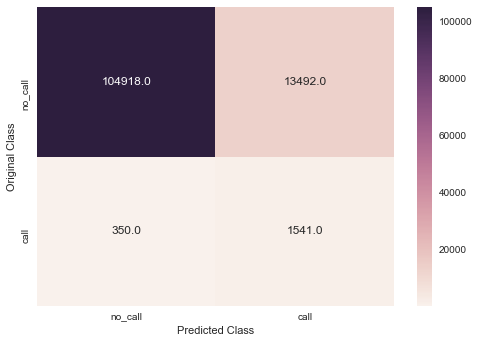

In [14]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
C = confusion_matrix(Y_test, model.predict(X_test_final))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["no_call","call"], yticklabels=["no_call","call"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [15]:
from xgboost import XGBClassifier
#from sklearn.ensemble import GradientBoostingClassifier
model = XGBClassifier(scale_pos_weight = 62.6, max_depth = 3, n_estimators = 2000)
model.fit(X_train_final, Y_train)
model.score(X_test_final, Y_test)

0.8945312175293638

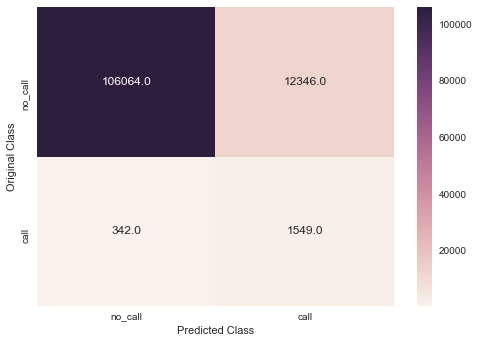

In [16]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
C = confusion_matrix(Y_test, model.predict(X_test_final))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["no_call","call"], yticklabels=["no_call","call"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
model = RandomForestClassifier(class_weight= 'balanced', n_estimators = 1000)
model.fit(X_train_final, Y_train)
model.score(X_test_final, Y_test)

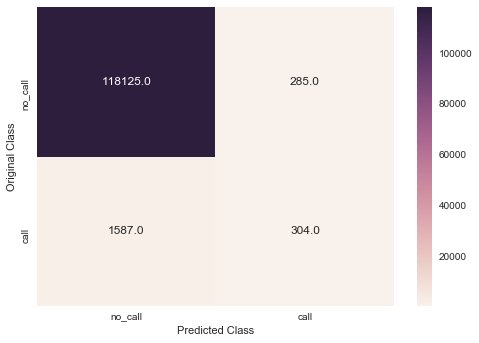

In [14]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
C = confusion_matrix(Y_test, model.predict(X_test_final))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["no_call","call"], yticklabels=["no_call","call"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [24]:
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index = final_names,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances.to_csv('imp_features.csv')

In [9]:
parameter = [{'n_estimators': [500,1000,2000]}]

In [11]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
model = GridSearchCV(XGBClassifier(scale_pos_weight = 62.6), parameter, scoring = 'f1', cv=3)
model.fit(X_train_final, Y_train)
print(model.best_estimator_)
print(model.score(X_test_final, Y_test))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2000,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=62.6, seed=None,
       silent=True, subsample=1)
0.19624984163182566


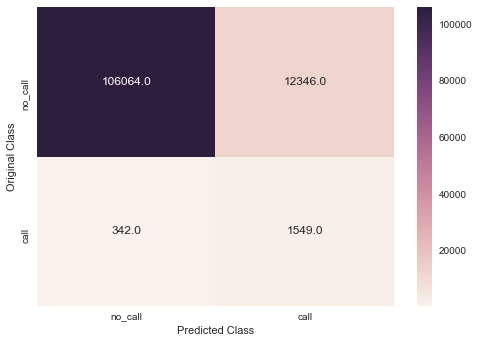

In [12]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
C = confusion_matrix(Y_test, model.predict(X_test_final))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["no_call","call"], yticklabels=["no_call","call"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [40]:
predicted_probas = model.predict_proba(X_test_final)

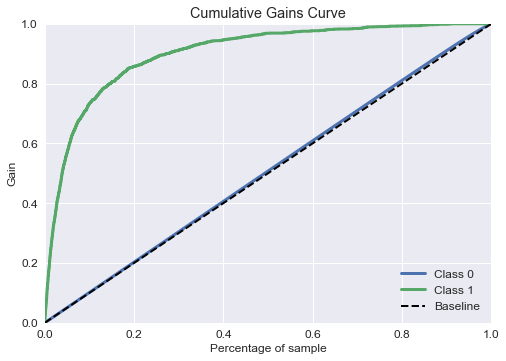

In [41]:
import matplotlib.pyplot as plt
import scikitplot as skplt
skplt.metrics.plot_cumulative_gain(Y_test, predicted_probas)
plt.show()

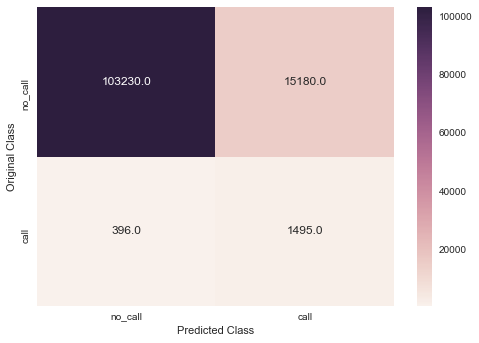

In [42]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
C = confusion_matrix(Y_test, model.predict(X_test_final))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["no_call","call"], yticklabels=["no_call","call"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train_final, Y_train)
model.score(X_test_final, Y_test)

0.9844390320944963

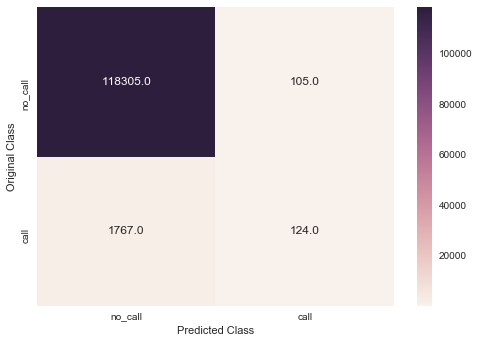

In [44]:
#plotting confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
C = confusion_matrix(Y_test, model.predict(X_test_final))
sns.heatmap(C,annot=True, fmt=".1f", xticklabels=["no_call","call"], yticklabels=["no_call","call"])
plt.xlabel('Predicted Class')
plt.ylabel('Original Class')
plt.show()

In [24]:
X_train_con[X_train_con < 0] = 0

In [26]:
X_train_con.columns

Index(['billed_amt', 'liable_chrg_amt', 'allw_amt', 'covered_amt', 'paid_amt',
       'dup_charge_amt', 'claim_processing_tat', 'pre_processing_tat',
       'paid_from_adjd_tat'],
      dtype='object')

In [25]:
## Univariate Selection
# Feature Extraction with Univariate Statistical Tests (Chi-squared for classification)
import pandas
import numpy
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X_train_con, Y_train)
# summarize scores
numpy.set_printoptions(precision=3)
print(fit.scores_)


[3.615e+06 2.623e+06 5.888e+03 3.023e+05 3.061e+03       nan 4.083e+03
 1.790e+04 5.722e+03]


In [21]:
# Feature Extraction with RFE
from pandas import read_csv
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# feature extraction
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, Y)
print("Num Features: %d") % fit.n_features_
print("Selected Features: %s") % fit.support_
print("Feature Ranking: %s") % fit.ranking_


Num Features: 3
Selected Features: [False False  True False  True  True]
Feature Ranking: [2 4 1 3 1 1]


In [22]:
# Feature Importance with Extra Trees Classifier
from pandas import read_csv
from sklearn.ensemble import ExtraTreesClassifier

# feature extraction
model = ExtraTreesClassifier()
model.fit(X, Y)
print(model.feature_importances_)


[0.19831611 0.17589071 0.00905682 0.21893039 0.2031182  0.19468778]


/app_2/Python_Inst/jupyter/anaconda2/lib/python2.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
